In [32]:
# Import modules
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Import models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.tree import ExtraTreeClassifier 

In [2]:
# 1.EDA

# Read file
df = pd.read_csv('smoke_detection_iot.csv', usecols = [i for i in range(1,16)])

# Show head of the file
df.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [3]:
df.shape

(62630, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             62630 non-null  int64  
 1   Temperature[C]  62630 non-null  float64
 2   Humidity[%]     62630 non-null  float64
 3   TVOC[ppb]       62630 non-null  int64  
 4   eCO2[ppm]       62630 non-null  int64  
 5   Raw H2          62630 non-null  int64  
 6   Raw Ethanol     62630 non-null  int64  
 7   Pressure[hPa]   62630 non-null  float64
 8   PM1.0           62630 non-null  float64
 9   PM2.5           62630 non-null  float64
 10  NC0.5           62630 non-null  float64
 11  NC1.0           62630 non-null  float64
 12  NC2.5           62630 non-null  float64
 13  CNT             62630 non-null  int64  
 14  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(7)
memory usage: 7.2 MB


Text(0.5, 1.0, 'Distribution of Missing Values')

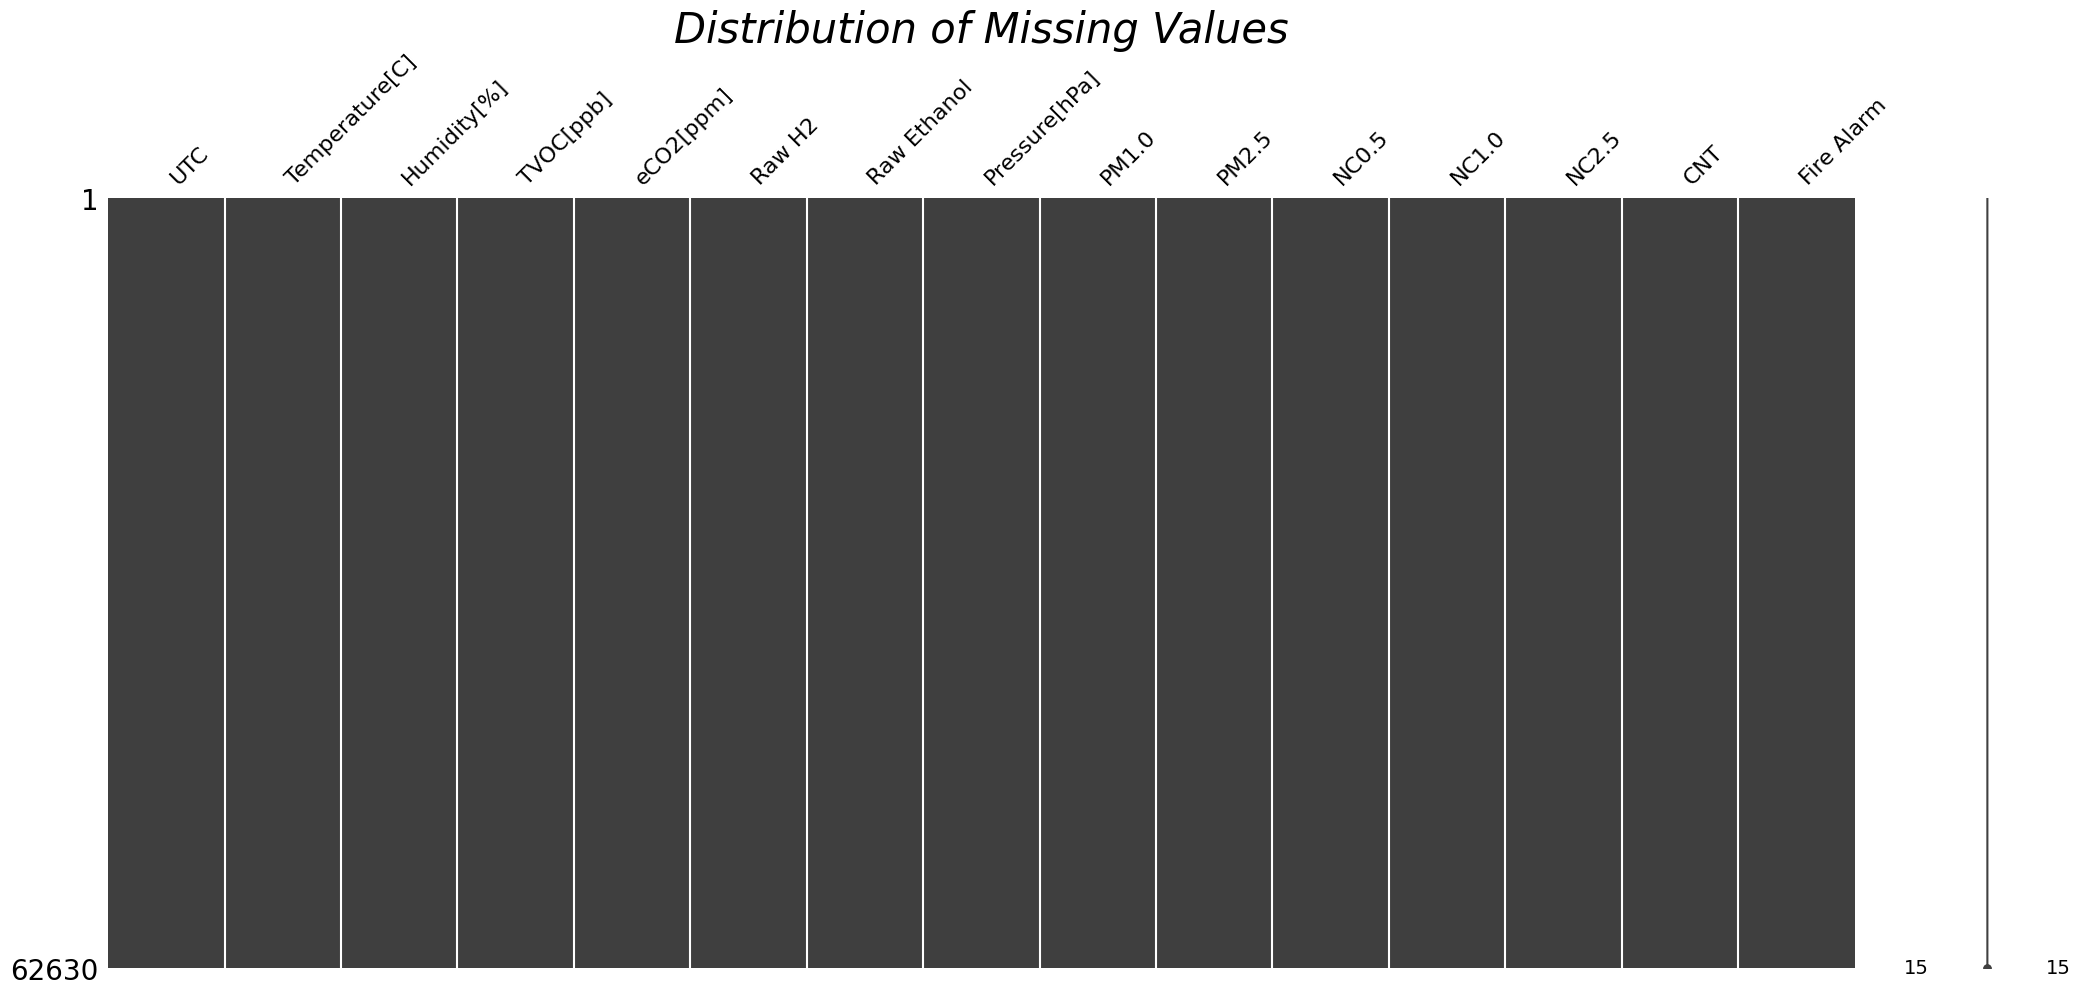

In [5]:
# Missing values
msno.matrix(df)
plt.title('Distribution of Missing Values', fontsize=30, fontstyle='oblique')

In [6]:
df.describe().T.sort_values(ascending = 0,by = "mean").style.background_gradient(cmap = "BuGn")\
.bar(subset = ["std"], color ="red").bar(subset = ["mean"], color ="blue")

,count,mean,std,min,25%,50%,75%,max
UTC,62630.000000,1654792066.184273,110002.488078,1654712187.000000,1654743244.250000,1654761919.500000,1654777576.750000,1655130051.000000
Raw Ethanol,62630.000000,19754.257912,609.513156,15317.000000,19435.000000,19501.000000,20078.000000,21410.000000
Raw H2,62630.000000,12942.453936,272.464305,10668.000000,12830.000000,12924.000000,13109.000000,13803.000000
CNT,62630.000000,10511.386157,7597.870997,0.000000,3625.250000,9336.000000,17164.750000,24993.000000
TVOC[ppb],62630.000000,1942.057528,7811.589055,0.000000,130.000000,981.000000,1189.000000,60000.000000
Pressure[hPa],62630.000000,938.627649,1.331344,930.852000,938.700000,938.816000,939.418000,939.861000
eCO2[ppm],62630.000000,670.021044,1905.885439,400.000000,400.000000,400.000000,438.000000,60000.000000
NC0.5,62630.000000,491.463608,4265.661251,0.000000,8.820000,12.450000,14.420000,61482.030000
NC1.0,62630.000000,203.586487,2214.738556,0.000000,1.384000,1.943000,2.249000,51914.680000
PM2.5,62630.000000,184.467770,1976.305615,0.000000,1.340000,1.880000,2.180000,45432.260000


In [7]:
# Getting all the unique values in each feature
features = df.columns

for feature in features:
    print(f"{feature} ---> {df[feature].nunique()}")

UTC ---> 62630
Temperature[C] ---> 21672
Humidity[%] ---> 3890
TVOC[ppb] ---> 1966
eCO2[ppm] ---> 1713
Raw H2 ---> 1830
Raw Ethanol ---> 2659
Pressure[hPa] ---> 2213
PM1.0 ---> 1337
PM2.5 ---> 1351
NC0.5 ---> 3093
NC1.0 ---> 4113
NC2.5 ---> 1161
CNT ---> 24994
Fire Alarm ---> 2


In [8]:
# Delete features that are not important for analysis
del_features = ['UTC','CNT']
for feature in del_features:
    df = df.drop(feature, axis = 1)
df.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,0
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,0
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,0
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,0


In [9]:
df.shape

(62630, 13)

<AxesSubplot:xlabel='Fire Alarm', ylabel='count'>

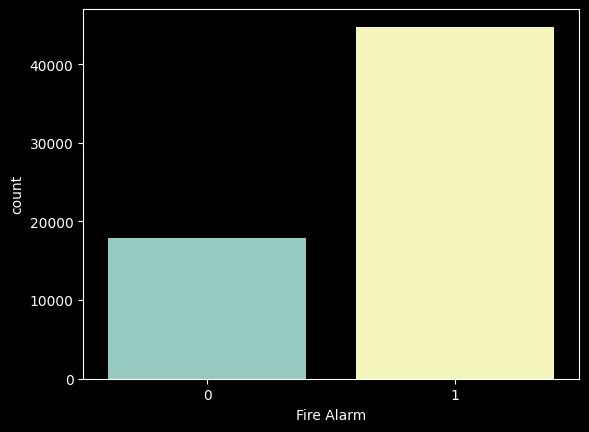

In [10]:
# Set style
plt.style.use('dark_background')
#sns.set_style('whitegrid')

# Set palette
sns.color_palette('deep')

# start EDA
sns.countplot(x='Fire Alarm', data=df)

<AxesSubplot:>

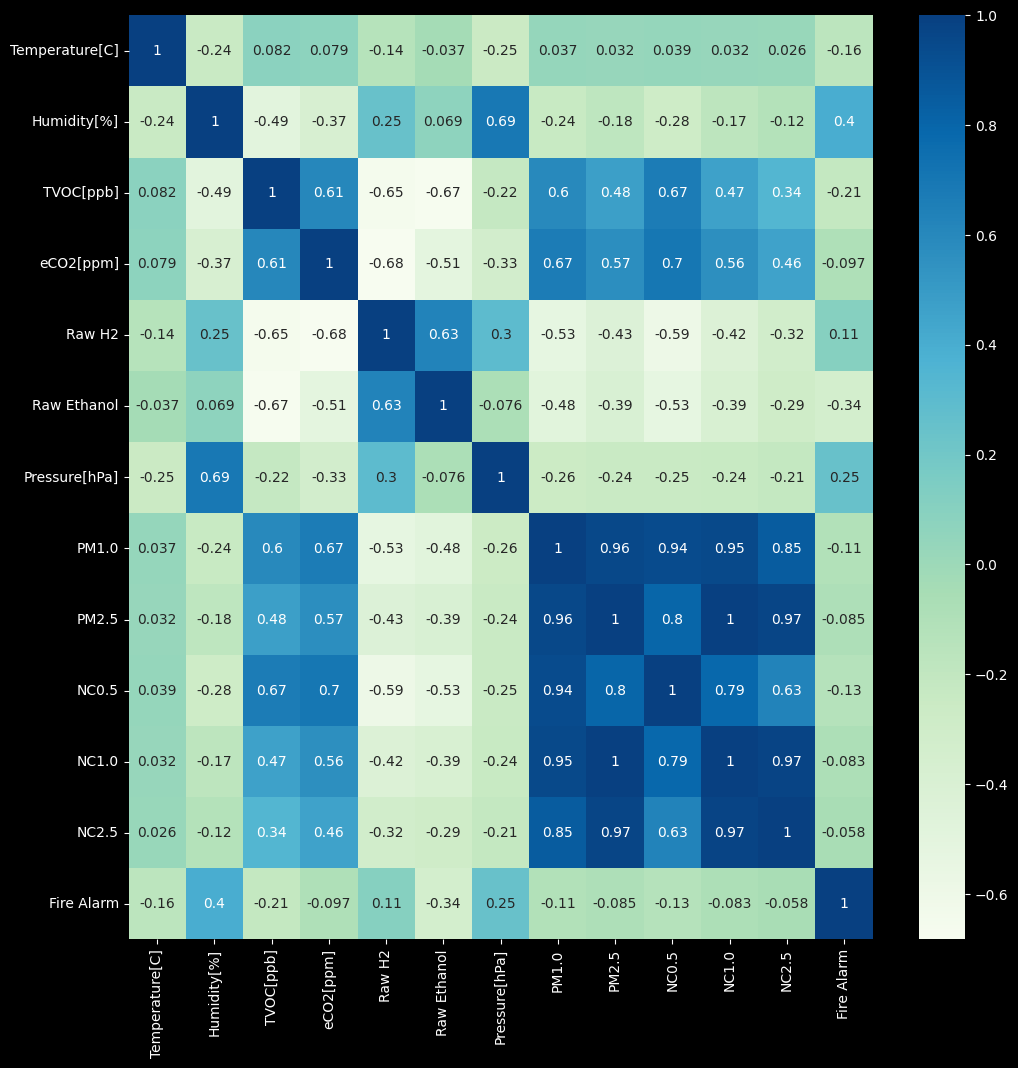

In [14]:
plt.figure(figsize = (12,12))
sns.heatmap(df.corr(), annot=True, cmap = 'GnBu')

In [20]:
features = df.keys()
features.drop('Fire Alarm')

subsets = ['TVOC[ppb]','PM1.0','PM2.5','NC0.5','NC1.0','NC2.5']
df.groupby('Fire Alarm').mean().style.bar(subset=subsets, color='green')

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5
Fire Alarm,,,,,,,,,,,,
0,19.694803,42.930077,4596.587255,962.587255,12896.316847,20082.823533,938.101383,261.982706,450.034639,1356.283816,493.872027,178.982259
1,14.483152,50.779534,882.013071,553.189356,12960.878053,19623.050428,938.837806,36.146406,78.417842,146.111337,87.665549,40.541627


In [21]:
features = df.keys()
features.drop('Fire Alarm')

subsets = ['TVOC[ppb]','PM1.0','PM2.5','NC0.5','NC1.0','NC2.5']
df.groupby('Fire Alarm').median().style.bar(subset=subsets, color='green')

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5
Fire Alarm,,,,,,,,,,,,
0,20.540000,46.140000,86.000000,400.000000,12837.000000,20158.000000,937.478000,1.450000,1.520000,9.970000,1.578000,0.039000
1,20.020000,51.400000,1103.000000,404.000000,12933.000000,19454.000000,938.878000,1.870000,1.940000,12.860000,2.005000,0.045000


In [ ]:
# Observations:
# 1. Considering correlation >=0.65 as high we can say that Pressure and Humidity have high correlation.
# 2. All PMs and NCs have correlaction between each other
# 3.TVOC,PM's and NC's are very Important attributes which can be used for Classification as the 
#   difference is very high between the values of both mean and median of the Target Variable.
# 4. Temperature is not important value for classification, because there is no big difference betweeen mean and median
# 5. The difference between mean and median of TVOC, PMs and NCs is very high. 
#    This tells us that there are many outliers present.

In [28]:
# 2. Moddeling

X = df.copy()
X.drop('Fire Alarm', axis=1)
y = df['Fire Alarm']

ss = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [29]:
# Implement models
models = [KNeighborsClassifier(),SGDClassifier(),LogisticRegression(),RandomForestClassifier(),GradientBoostingClassifier(),
         AdaBoostClassifier(),BaggingClassifier(),SVC(),GaussianNB(),DummyClassifier(),ExtraTreeClassifier()]

In [34]:
Name = []
Accuracy = []
R2 = []
Time = []

for model in models:
    Name.append(type(model).__name__)
    begin_time = time.time()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    end_time = time.time()
    Time.append(end_time - begin_time)
    Accuracy.append(accuracy_score(predictions, y_test))
    R2.append(model.score(X_test, y_test))

In [41]:
data = {'Name' : Name, 'Accuracy' : Accuracy, 'R2' : R2, 'Time' : Time}
model_data = pd.DataFrame(data)
model_data

,Name,Accuracy,R2,Time
0,KNeighborsClassifier,1.000000,1.000000,1.078709
1,SGDClassifier,1.000000,1.000000,0.039507
2,LogisticRegression,1.000000,1.000000,0.171927
3,RandomForestClassifier,1.000000,1.000000,2.257897
4,GradientBoostingClassifier,1.000000,1.000000,4.469682
5,AdaBoostClassifier,1.000000,1.000000,0.048213
6,BaggingClassifier,1.000000,1.000000,0.296843
7,SVC,1.000000,1.000000,1.344522
8,GaussianNB,1.000000,1.000000,0.031244
9,DummyClassifier,0.712199,0.712199,0.000000


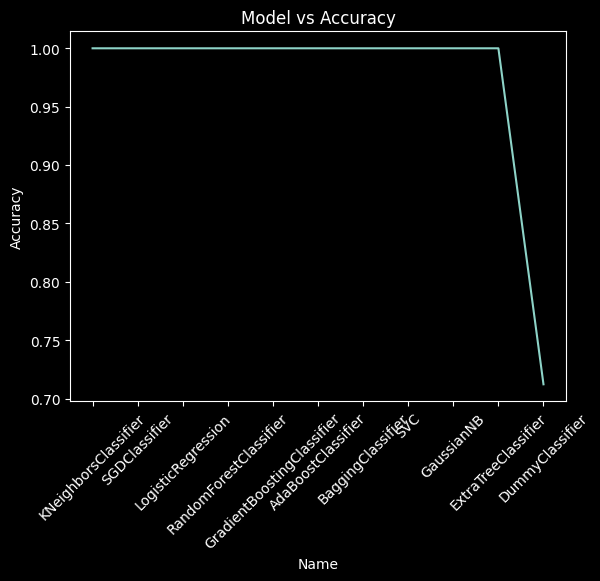

In [43]:
model_data.sort_values(ascending=False, by='Accuracy', inplace = True)
sns.lineplot(x='Name', y='Accuracy', data=model_data)
plt.title("Model vs Accuracy")
plt.xticks(rotation=45)
plt.show()

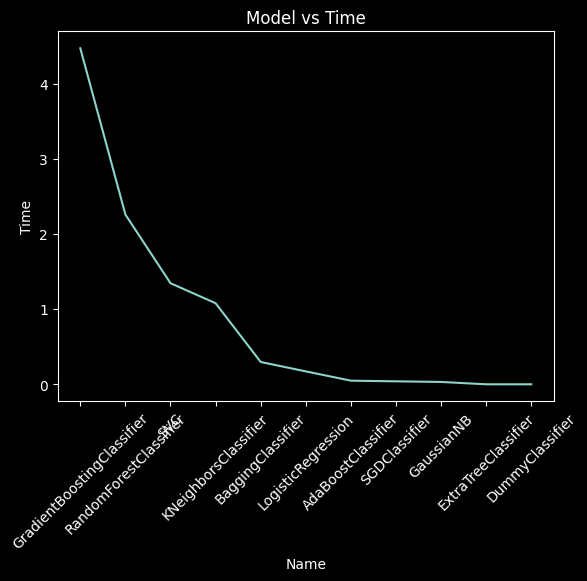

In [44]:
model_data.sort_values(by="Time", ascending=False, inplace=True)
sns.lineplot(x="Name", y="Time", data=model_data)
plt.xticks(rotation=45)
plt.title("Model vs Time")
plt.show()

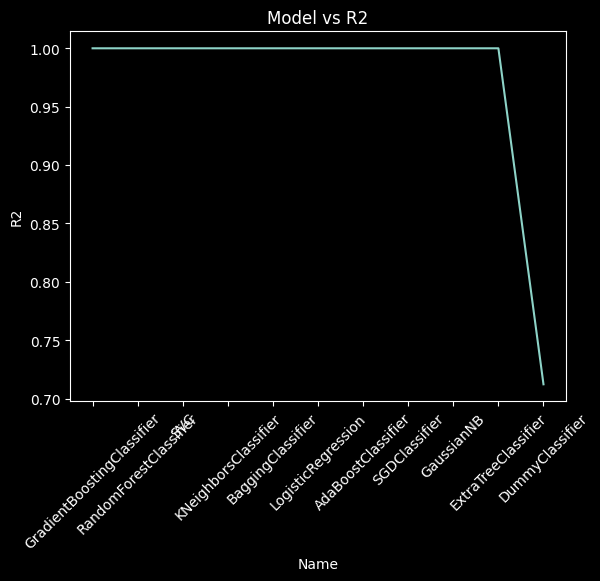

In [45]:
model_data.sort_values(by="R2", ascending=False, inplace=True)
sns.lineplot(x="Name", y="R2", data=model_data)
plt.xticks(rotation=45)
plt.title("Model vs R2")
plt.show()